This notebook predicts the chances of admission of students with different scores like GRE, TOEFL, etc. in masters program using regression. Dataset has 6 parameters and 1 column specifying the chances of admission.

Dataset source: Kaggle

# Import Library

 The 'Pandas' package is a fast, flexible tool used to analyze data. It helps in reading and updating the files like csv files, excel, etc.

In [32]:
import pandas as pd

# Import data

Dataset is imported from github in raw form.

In [33]:
data = pd.read_csv("https://github.com/Muskan2320/Regression/raw/main/Chance%20of%20Admission%20Prediction/Admission%20Predict.csv")
data.head()                                                                                      # Dataframe_name.head() return the first five rows of the dataframe.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Define dependent and independent variables

In [46]:
print(data.columns)                                            # Returns the name of columns

Y = data['Chance of Admit']
X = data.drop(['Serial No.','Chance of Admit'], axis=1)        # axis = 1 means it drops the column

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


# Split training and test data

In [47]:
from sklearn.model_selection import train_test_split

# Specifying the train size to 0.7 means splitting the data in 70% train data and 30% test data. It can also be done using test_size = 0.3
# Specifying the random_state means specifying the seed as row are assigned to train and test set randomly.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 200)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((350, 7), (150, 7), (350,), (150,))

# Select Model

We are using regression for prediction.

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [49]:
model.fit(X_train, Y_train)       # Fitting the data to model means model is learning patterns from training set

LinearRegression()

In [50]:
# Model is the line that is y = b + b1(x1) + b2(x2) + ..... Here, b is the intercept

model.intercept_

-1.231315091754147

In [51]:
# Model is the line that is y = b + b1(x1) + b2(x2) + ..... Here, b1, b2, ... are the coefficients

model.coef_

array([0.00177713, 0.00250556, 0.0038434 , 0.00887346, 0.01637075,
       0.11766271, 0.02368938])

# Model prediction on test data

In [52]:
y_pred = model.predict(X_test)

# Visualization

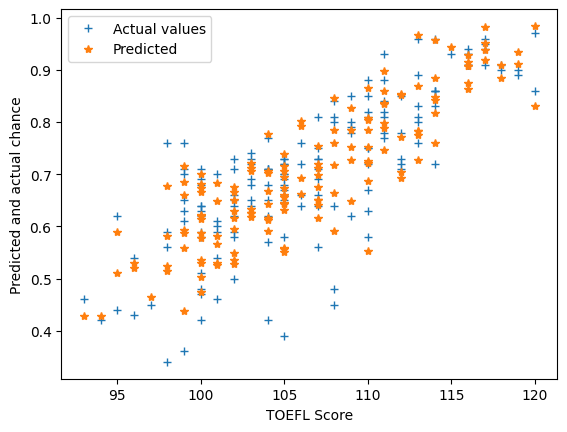

In [53]:
import matplotlib.pyplot as plt

# plotting actual and predicted values

plt.plot(X_test['TOEFL Score'], Y_test, '+', label = 'Actual values')
plt.plot(X_test['TOEFL Score'], y_pred, '*', label = 'Predicted')
plt.xlabel("TOEFL Score")
plt.ylabel("Predicted and actual chance")
plt.legend()

# Model Accuracy

In regression, we have several error funcions to tell how good our model predicts.

In [54]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [55]:
# Mean Absolute Error also known as L1 loss. It is calculated by taking mean of absolute value of differences to y_actual and y_pred i.e. sum( |y_actual - y_pred| ) / no. of points

print("Mean Absolute Error")
mean_absolute_error(Y_test, y_pred)

Mean Absolute Error


0.04355642296043852

In [56]:
print("Mean Absolute Percentage Error")                   # Calculating the percentage of absolute error
mean_absolute_percentage_error(Y_test, y_pred)

Mean Absolute Percentage Error


0.07272686819477997

In [57]:
# Mean Absolute Error also known as L2 loss. It is calculated by taking mean of squares of differences to y_actual and y_pred i.e. sum( (y_actual - y_pred)^2 ) / no. of points

print("Mean Squared Error")
mean_squared_error(Y_test, y_pred)

Mean Squared Error


0.0038829537910952633